In [1]:
import pandas as pd

df = pd.read_csv('douyin_dataset.csv')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid")

def plot_author_work_distribution(df):
    """1. 作者作品产出分布 (log scale)"""
    author_counts = df['author_id'].value_counts()
    plt.figure(figsize=(10,6))
    sns.histplot(author_counts, bins=50, kde=True, log_scale=True)
    plt.title('Author Production Distribution (Log-Scale)')
    plt.xlabel('Number of Works per Author (log)')
    plt.ylabel('Number of Authors')
    plt.show()

def plot_author_like_rate_distribution(df):
    """2. 作者平均点赞率分布 (log scale)"""
    author_likes = df.groupby('author_id')['like'].mean()
    plt.figure(figsize=(10,6))
    sns.histplot(author_likes, bins=50, kde=True, log_scale=True)
    plt.title('Author Average Like Rate Distribution (Log-Scale)')
    plt.xlabel('Average Like Rate per Author (log)')
    plt.ylabel('Number of Authors')
    plt.show()

def plot_author_finish_rate_violin(df):
    """3. 作者平均完播率分布 (Violin Plot)"""
    author_finish = df.groupby('author_id')['finish'].mean()
    plt.figure(figsize=(10,6))
    sns.violinplot(x=author_finish, inner="box")
    plt.title('Distribution of Author Finish Rates')
    plt.xlabel('Finish Rate')
    plt.show()

def plot_duration_vs_finish_scatter(df):
    """4. 作品时长与完播率关系 (时长裁剪到0-100s)"""
    item_finish = df.groupby('item_id').agg({'duration_time':'mean', 'finish':'mean'})
    item_finish = item_finish[item_finish['duration_time'] <= 100]  # 裁剪
    plt.figure(figsize=(10,6))
    sns.scatterplot(x='duration_time', y='finish', data=item_finish, alpha=0.5)
    plt.title('Video Duration vs Finish Rate (0-100s)')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Finish Rate')
    plt.show()

def plot_publish_hour_vs_finish_curve(df):
    """5. 作品发布时间与完播率关系"""
    hour_finish = df.groupby('H')['finish'].mean()
    plt.figure(figsize=(10,6))
    sns.lineplot(x=hour_finish.index, y=hour_finish.values, marker='o')
    plt.title('Publish Hour vs Average Finish Rate')
    plt.xlabel('Publish Hour')
    plt.ylabel('Average Finish Rate')
    plt.xticks(range(0,24))
    plt.show()

def plot_channel_finish_like_comparison(df):
    """6. 不同频道的完播率与点赞率（并列柱状图）"""
    channel_stats = df.groupby('channel').agg({'finish':'mean', 'like':'mean'}).reset_index()
    x = np.arange(len(channel_stats))
    width = 0.4
    fig, ax = plt.subplots(figsize=(10,6))
    ax.bar(x - width/2, channel_stats['finish'], width, label='Finish Rate')
    ax.bar(x + width/2, channel_stats['like'], width, label='Like Rate')
    ax.set_xticks(x)
    ax.set_xticklabels(channel_stats['channel'])
    ax.set_title('Finish Rate and Like Rate by Channel')
    ax.set_xlabel('Channel')
    ax.set_ylabel('Rate')
    ax.legend()
    plt.show()

def plot_top_cities_by_like_rate(df):
    """7. 浏览量最高城市的平均点赞率（横轴为City ID，纵轴为Like Rate）"""
    top_cities = df['item_city'].value_counts().head(20).index
    city_likes = df[df['item_city'].isin(top_cities)].groupby('item_city')['like'].mean().sort_values(ascending=False)

    plt.figure(figsize=(12,6))
    sns.barplot(x=city_likes.index.astype(int), y=city_likes.values, palette='viridis')
    plt.title('Top 20 Most Viewed Cities: Average Like Rate')
    plt.xlabel('City ID')
    plt.ylabel('Average Like Rate')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


def plot_top_music_usage(df):
    """8. 音乐使用频次Top榜（Top 15）"""
    music_counts = df['music_id'].value_counts().head(15)
    plt.figure(figsize=(12,6))
    sns.barplot(x=music_counts.values, y=music_counts.index, palette='rocket')
    plt.title('Top 15 Most Used Music IDs')
    plt.xlabel('Usage Count')
    plt.ylabel('Music ID')
    plt.show()

def plot_duration_bucket_finish_rate(df):
    """9. 作品时长分桶与完播率"""
    bins = [0,5,10,30,60,1000]
    labels = ['0-5s','5-10s','10-30s','30-60s','60s+']
    df['duration_bucket'] = pd.cut(df['duration_time'], bins=bins, labels=labels)
    bucket_finish = df.groupby('duration_bucket')['finish'].mean()
    plt.figure(figsize=(10,6))
    sns.barplot(x=bucket_finish.index, y=bucket_finish.values, palette='mako')
    plt.title('Finish Rate by Video Duration Bucket')
    plt.xlabel('Duration Bucket')
    plt.ylabel('Finish Rate')
    plt.show()

def plot_author_posting_activity(df):
    """10. 作者活跃发布时间分布"""
    author_hour = df.groupby('H').size()
    plt.figure(figsize=(10,6))
    sns.lineplot(x=author_hour.index, y=author_hour.values, marker='o')
    plt.title('Distribution of Author Posting Hours')
    plt.xlabel('Publish Hour')
    plt.ylabel('Number of Works Published')
    plt.xticks(range(0,24))
    plt.show()

def plot_publish_age_vs_like_rate(df):
    """11. 作品发布天数与平均点赞率（每2天一个桶，基准为数据集当年最后一天）"""
    # 保证real_time是datetime格式
    if not pd.api.types.is_datetime64_any_dtype(df['real_time']):
        df['real_time'] = pd.to_datetime(df['real_time'], errors='coerce')
    
    # 找到数据中最大年份
    max_year = df['real_time'].dt.year.max()
    simulated_now = pd.Timestamp(f'{max_year}-12-31')

    # 计算基于模拟today的天数差
    df['days_since_publish'] = (simulated_now - df['real_time']).dt.days

    # 以2天为一个桶
    max_days = df['days_since_publish'].max()
    bins = np.arange(0, max_days + 2, 2)  # 每2天一个桶
    df['publish_days_bucket'] = pd.cut(df['days_since_publish'], bins=bins)

    # 按桶统计平均like率
    bucket_like = df.groupby('publish_days_bucket')['like'].mean()

    plt.figure(figsize=(16,6))
    sns.lineplot(x=bucket_like.index.astype(str), y=bucket_like.values, marker='o')
    plt.xticks(rotation=45, ha='right')
    plt.title('Average Like Rate by Days Since Publish (2-Day Buckets, Simulated Year-End)')
    plt.xlabel('Days Since Publish (2-Day Buckets)')
    plt.ylabel('Average Like Rate')
    plt.tight_layout()
    plt.show()



def plot_view_count_bucket_like_rate(df):
    """12. 作品播放量分桶与点赞率关系"""
    item_stats = df.groupby('item_id').agg(view_count=('uid','count'), like_rate=('like','mean'))
    bins = [0,10,100,1000,10000,100000]
    labels = ['0-10','10-100','100-1k','1k-10k','10k+']
    item_stats['view_bucket'] = pd.cut(item_stats['view_count'], bins=bins, labels=labels)
    bucket_like = item_stats.groupby('view_bucket')['like_rate'].mean()

    plt.figure(figsize=(10,6))
    sns.barplot(x=bucket_like.index, y=bucket_like.values, palette='coolwarm')
    plt.title('Average Like Rate by View Count Bucket')
    plt.xlabel('View Count Bucket')
    plt.ylabel('Average Like Rate')
    plt.show()

def plot_user_author_interaction_distribution(df):
    """13. 用户和作者交互关系分布（用户看多少作者、作者被多少用户浏览）"""
    user_author_edges = df[['uid', 'author_id']].drop_duplicates()
    user_degrees = user_author_edges['uid'].value_counts()
    author_degrees = user_author_edges['author_id'].value_counts()

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))

    sns.histplot(user_degrees, bins=50, log_scale=True, ax=ax1)
    ax1.set_title('Distribution of Number of Authors per User')
    ax1.set_xlabel('Number of Authors Interacted (log)')
    ax1.set_ylabel('Number of Users')

    sns.histplot(author_degrees, bins=50, log_scale=True, ax=ax2, color='orange')
    ax2.set_title('Distribution of Number of Users per Author')
    ax2.set_xlabel('Number of Users Interacted (log)')
    ax2.set_ylabel('Number of Authors')

    plt.tight_layout()
    plt.show()


In [10]:
import pandas as pd

df = pd.read_csv('douyin_dataset.csv')


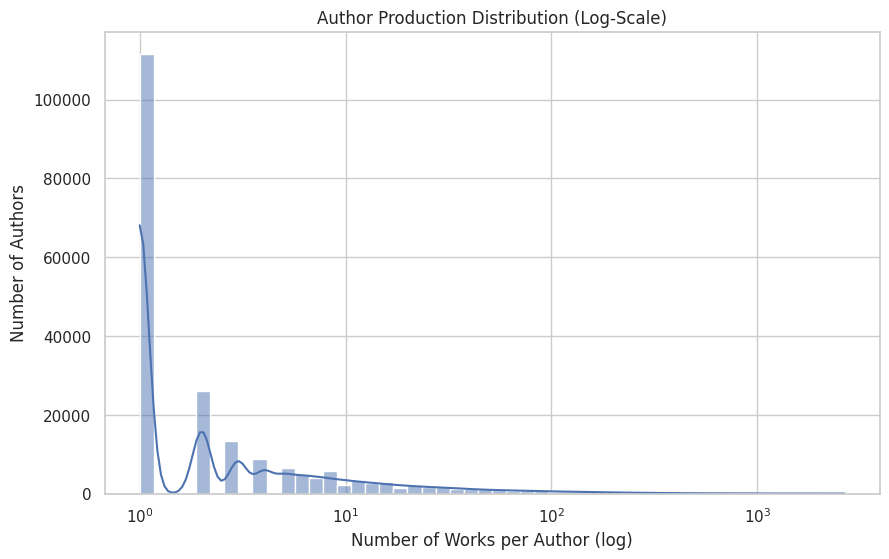

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


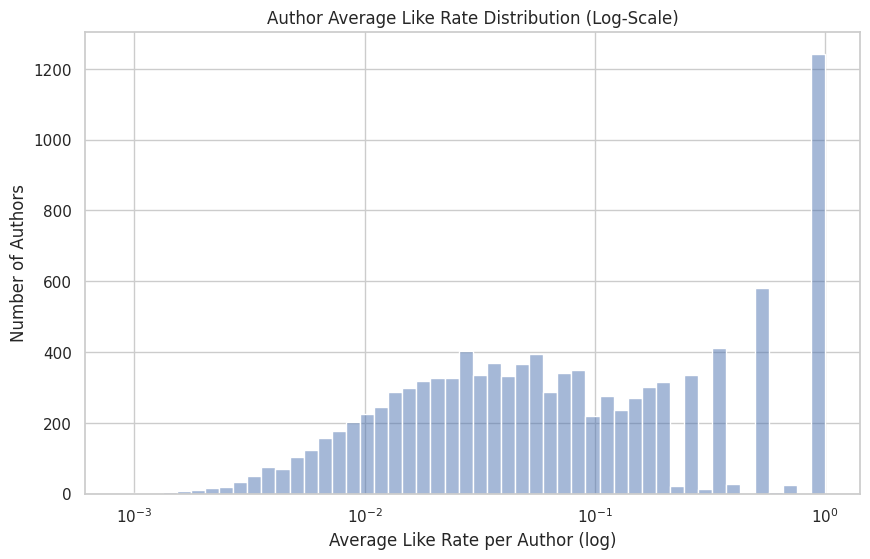

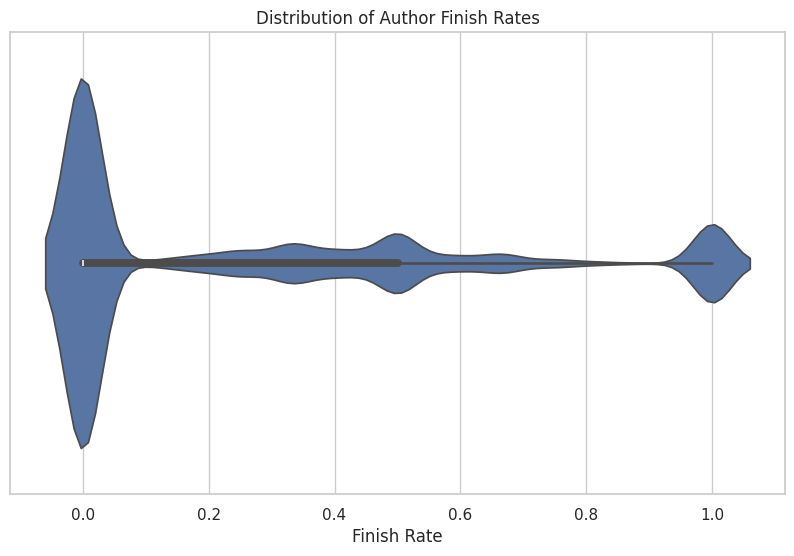

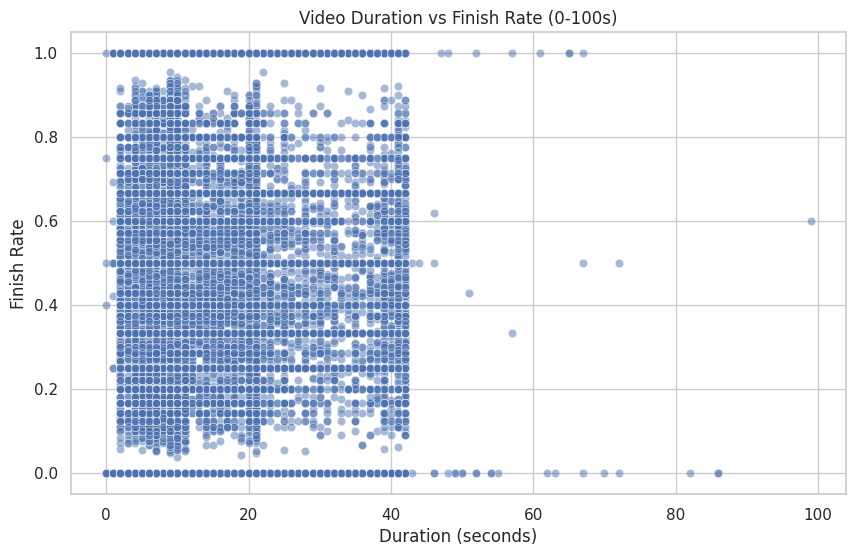

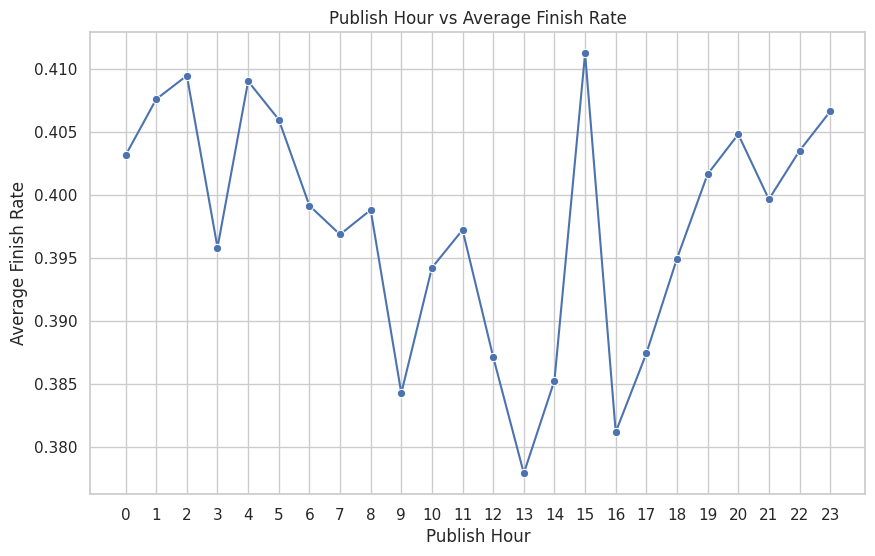

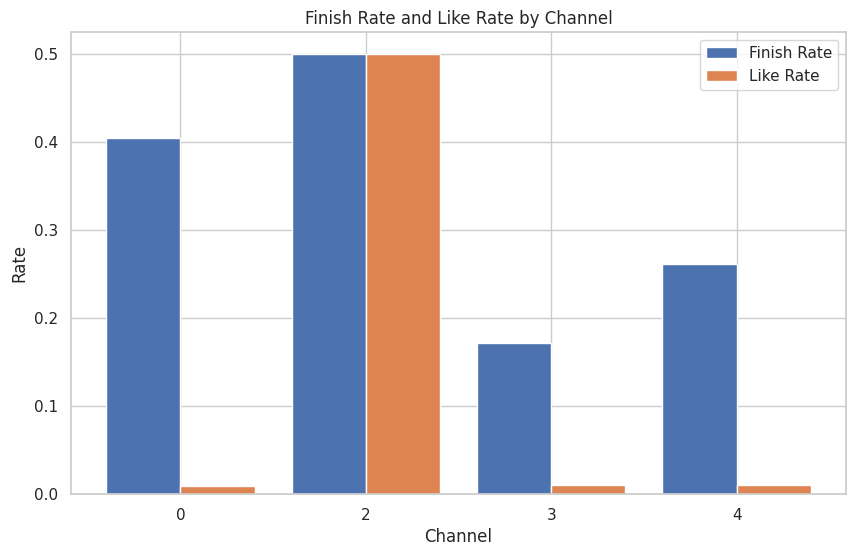

/tmp/ipykernel_487932/4179569801.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_likes.index.astype(int), y=city_likes.values, palette='viridis')


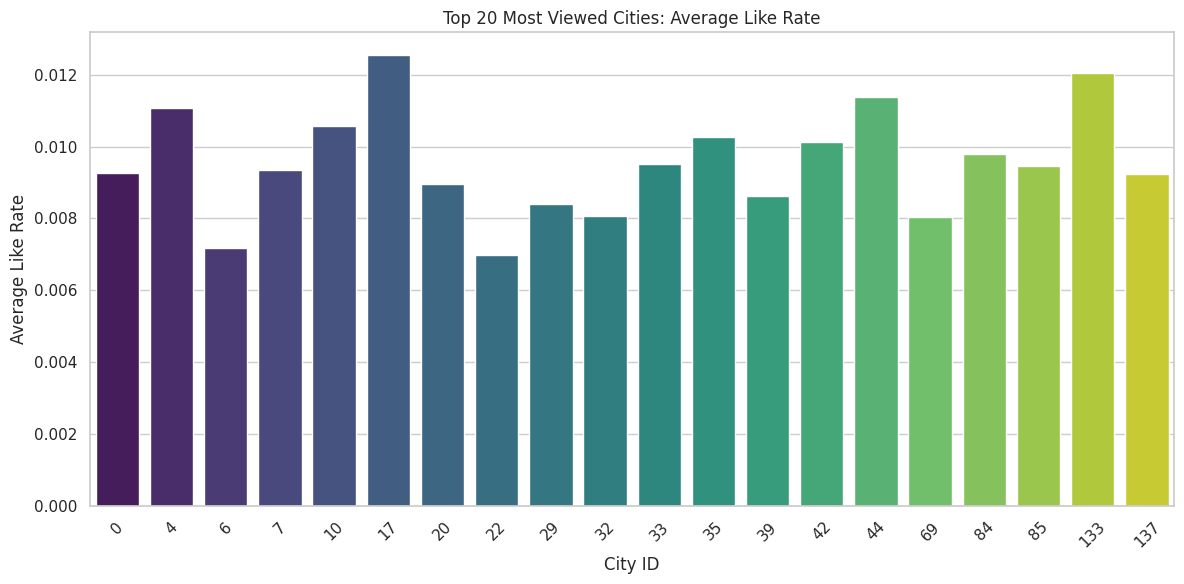

/tmp/ipykernel_487932/4179569801.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=music_counts.values, y=music_counts.index, palette='rocket')


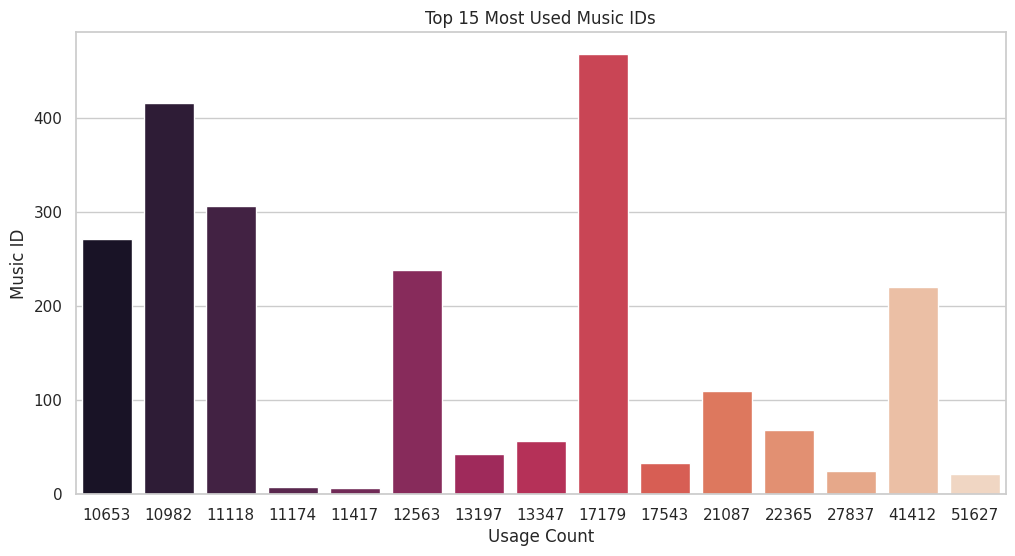

/tmp/ipykernel_487932/4179569801.py:105: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_finish = df.groupby('duration_bucket')['finish'].mean()
/tmp/ipykernel_487932/4179569801.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bucket_finish.index, y=bucket_finish.values, palette='mako')


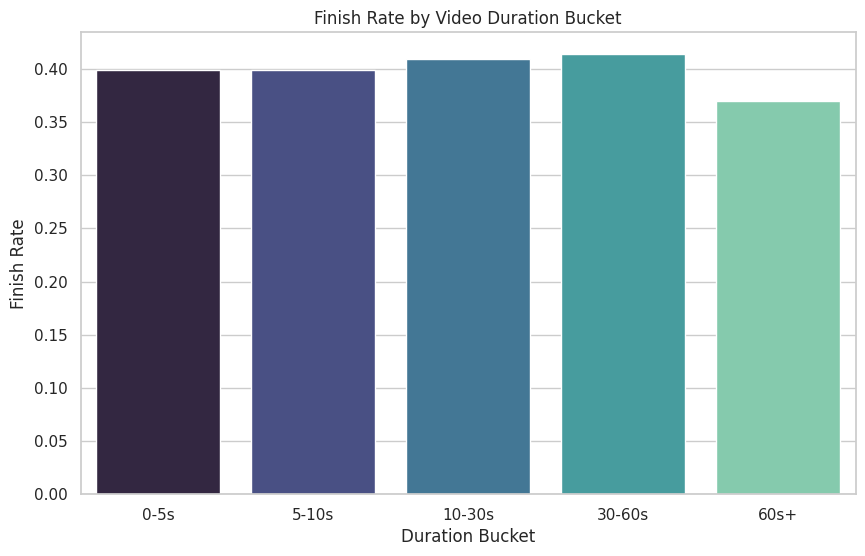

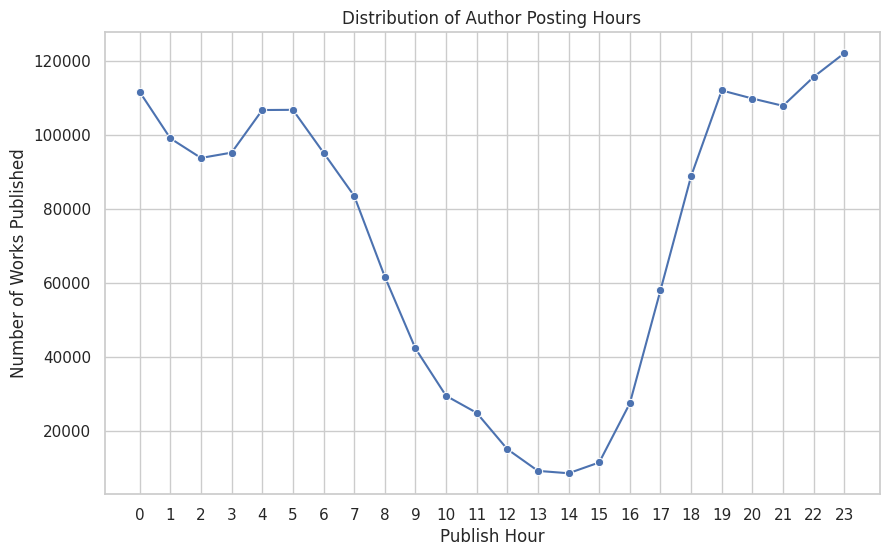

/tmp/ipykernel_487932/4179569801.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_like = df.groupby('publish_days_bucket')['like'].mean()


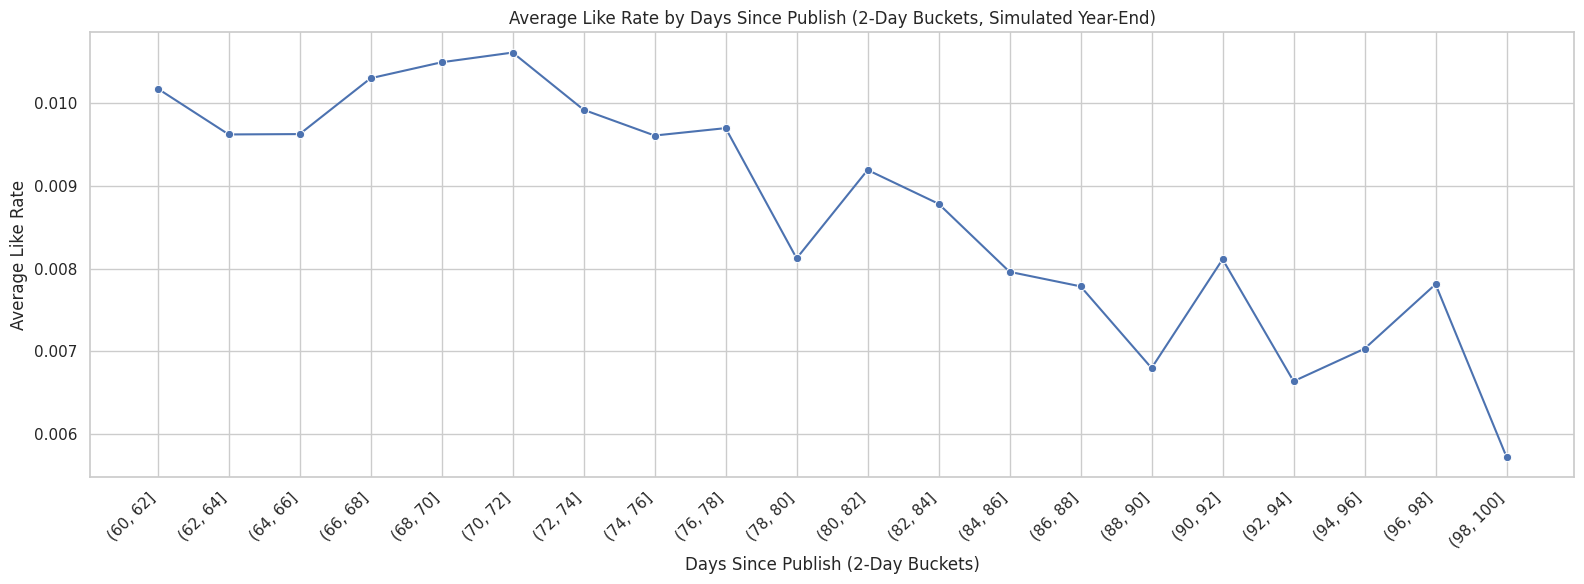

/tmp/ipykernel_487932/4179569801.py:162: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_like = item_stats.groupby('view_bucket')['like_rate'].mean()
/tmp/ipykernel_487932/4179569801.py:165: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bucket_like.index, y=bucket_like.values, palette='coolwarm')


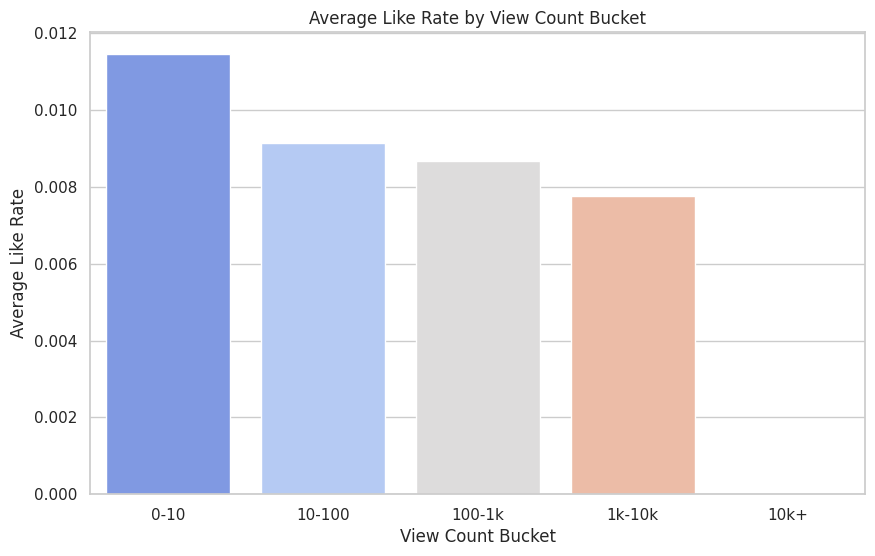

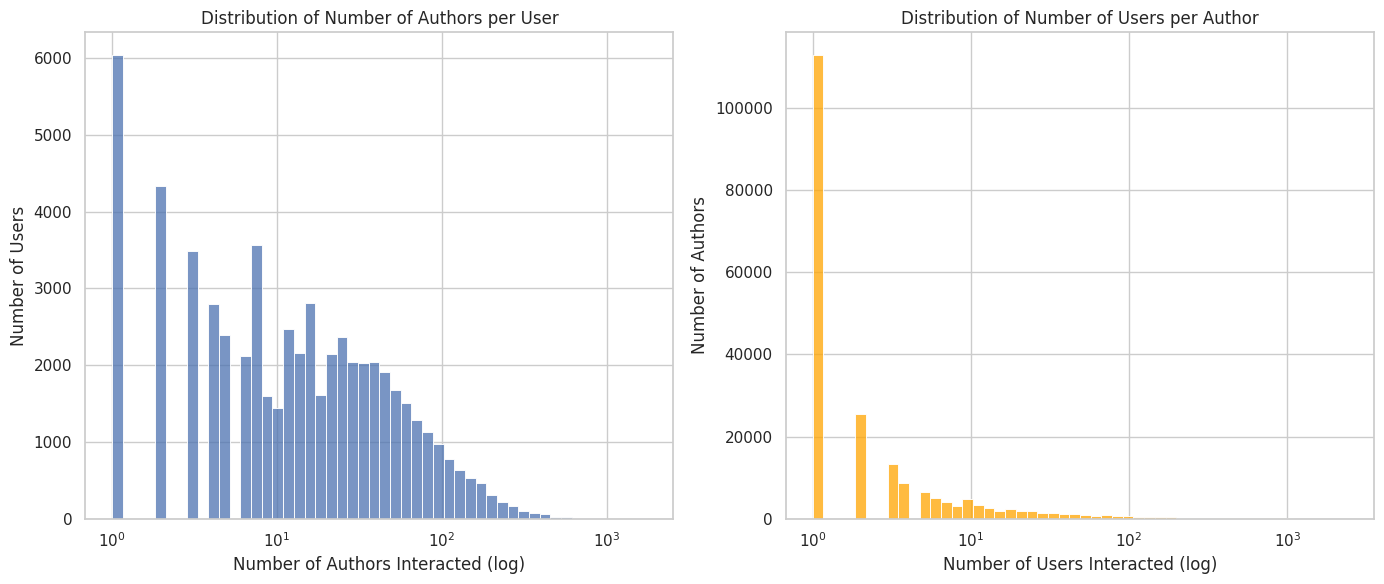

In [ ]:

plot_author_work_distribution(df)
plot_author_like_rate_distribution(df)
plot_author_finish_rate_violin(df)
plot_duration_vs_finish_scatter(df)
plot_publish_hour_vs_finish_curve(df)
plot_channel_finish_like_comparison(df)
plot_top_cities_by_like_rate(df)
plot_top_music_usage(df)
plot_duration_bucket_finish_rate(df)
plot_author_posting_activity(df)
plot_publish_age_vs_like_rate(df)
plot_view_count_bucket_like_rate(df)
plot_user_author_interaction_distribution(df)
